In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import htext
from pywaffle import Waffle
from scraype import FbrefScrayper
import math

In [6]:
df = pd.read_csv("/work/scrayper/understats/datasets/epl/shots_epl_16-17.csv")
df = pd.read_csv("/work/scrayper/understats/datasets/la_liga/shots_la_liga_18-19.csv")
df18 = pd.read_csv("/work/scrayper/understats/datasets/la_liga/shots_la_liga_18-19.csv")


df18 = df18[df18["player"].str.contains("Coutinho")]


In [7]:
targetTeam = "Bayern Munich"
team = df[(df["h_team"]==targetTeam)|(df["a_team"]==targetTeam)]
teamShot = len(team)
teamGoal = len(team[team["result"]=="Goal"])

In [8]:
df = df[df["player"].str.contains("Robben")]
df.reset_index(inplace=True, drop=True)

pkgoal = df[df["situation"]=="Penalty"]
pk = len(pkgoal[pkgoal["result"]=="Goal"])


df = df[df["situation"]!="Penalty"]

goal = len(df[df["result"]=="Goal"])

teamGoalPer = round(goal/teamGoal * 100,2)
teamShotPer = round(len(df)/teamShot*100,2)

In [132]:
fbref = pd.read_csv("/work/assets/fbref/leagueStats/premier/1617/shooting.csv")
print(fbref.columns)
targetPlayer = "Coutinho"
fbref = fbref[fbref["Player"].str.contains(targetPlayer)]
fbref.reset_index(inplace=True, drop=True)
sot=fbref.loc[0,"SoT_Standard"]
sotPer=fbref.loc[0,"SoT%_Standard"]
conv = round(goal/sot *100)
# npxg = fbref.loc[0,"npxG_Expected"]
# npxg90 = round(npxg / fbref.loc[0,"90s"],2)
# xgd = round(goal-npxg,2)
# xgd = f"+{xgd}" if xgd >0 else f"-{xgd}"
# goal90 = round(goal / fbref.loc[0,"90s"],2)

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'Gls', 'Sh_Standard', 'SoT_Standard', 'SoT%_Standard', 'Sh/90_Standard',
       'SoT/90_Standard', 'G/Sh_Standard', 'G/SoT_Standard', 'Dist_Standard',
       'PK_Performance', 'PKatt_Performance'],
      dtype='object')


NameError: name 'npxg' is not defined

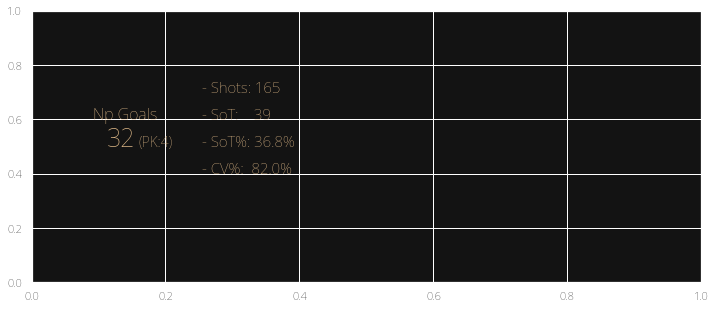

In [133]:
fig,axes = plt.subplots(figsize=(12,5))
axes.set_facecolor("#131313")

axes.text(x=.091,y=.6,s="Np Goals",fontdict={"color":text_color,"fontsize":16})
axes.text(x=.113,y=.5,s=f"{goal}",fontdict={"color":text_color,"fontsize":25})
axes.text(x=.159,y=.5,s=f"(PK:{pk})",fontdict={"color":text_color,"fontsize":14})

axes.text(x=.255,y=.7,s=f"- Shots: {len(df)}",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.255,y=.6,s=f"- SoT:    {sot}",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.255,y=.5,s=f"- SoT%: {sotPer}%",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.255,y=.4,s=f"- CV%:  {conv}%",fontdict={"color":text_color,"fontsize":15})

axes.text(x=.455,y=.7,s=f"- nPxG:    {npxg}",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.455,y=.6,s=f"- nPxG90:  {npxg90}",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.455,y=.5,s=f"- Goal-xG: {xgd}",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.455,y=.4,s=f"- Goal90:    {goal90}",fontdict={"color":text_color,"fontsize":15})


axes.text(x=.685,y=.6,s=f"- Goal(% of Team): {teamGoalPer}%",fontdict={"color":text_color,"fontsize":15})
axes.text(x=.685,y=.5,s=f"- Shot(% of Team): {teamShotPer}%",fontdict={"color":text_color,"fontsize":15})



axes.plot((.23,.23),(0.32,.82),color="#9d6b53",linestyle=":")
axes.plot((.42,.42),(0.32,.82),color="#9d6b53",linestyle=":")
axes.plot((.645,.645),(0.32,.82),color="#9d6b53",linestyle=":")
axes.plot((.97,.97),(0.32,.82),color="#9d6b53",linestyle=":")


axes.set_xlim(0.051,1)
axes.set_ylim(.2,.9)
plt.axis("off")

axes.plot((0.051,1),(.81,.81),color="#9d6b53",linestyle=":")
axes.plot((0.051,1),(.32,.32),color="#9d6b53",linestyle=":")

axes.text(x=.1,y=1.0,s=f"Antoine Griezmann 18/19",fontdict={"color":text_color,"fontsize":18})
axes.text(x=.1,y=.929,s="Nationality: France",fontdict={"color":text_color,"fontsize":16})
axes.text(x=.1,y=.8829,s="Age: 28",fontdict={"color":text_color,"fontsize":16})
axes.text(x=.1,y=.8329,s="Footed: Left",fontdict={"color":text_color,"fontsize":16})

plt.savefig(f'/work/output/barcelona/shotmap{df.loc[1,"player"]}02.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [6]:
len(df[df["result"]=="Goal"])

5

In [9]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
from PIL import Image

from matplotlib.patches import Circle, Rectangle, Arc

def media_cancha(ax=None, color='#DEB887', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((1, 0.204), -0.17, 0.592, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((1, 0.352), -0.057, 0.296, linewidth=lw, color=color, fill=False)
    porteria = Rectangle((1, 0.44), 0.008, 0.12, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.838, 0.5), 0.065, 0.2, theta1=95, theta2=265, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.025, 0.038, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((1, 0), 0.025, 0.038, theta1=90, theta2=180, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((1, 0), -0.5, 1, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax



In [10]:
def media_cancha_vertical(ax=None, color='#9d6b53', lw=1.5, outer_lines=True):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((.204,1), 0.592, -0.165, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((0.352,1), 0.296, -0.05, linewidth=lw, color=color, fill=False)

    porteria = Rectangle((.44, 1), 0.12, 0.014, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.5,0.845), 0.2, 0.065, theta1=185, theta2=355, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.12, 0.048, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((0, 1), 0.12, 0.048, theta1=270, theta2=360, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((0,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines2 = Rectangle((1,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines3 = Rectangle((0,1), 1, 0, linewidth=lw, color=color, fill=False)
        
        court_elements.append(outer_lines)
        court_elements.append(outer_lines2)
        court_elements.append(outer_lines3)
        

    for element in court_elements:
        ax.add_patch(element)
    
        
    return ax



In [11]:
background = '#131313'
text_color = '#DEB887'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='cmb10'
mpl.rcParams['legend.fontsize'] = 15

#Loading Some Fonts
URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
# URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
URL3 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
URL4 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
URL5 = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'

# font_regular = FontManager(URL2)
font_regular2 = FontManager(URL3)
font_regular3 = FontManager(URL5)


# font_bold = FontManager(URL)
# font_label = FontManager(URL)
font_label2 = FontManager(URL4)

pitch_color = '#131313'
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

In [24]:
# df = df[(df["h_team"]!="Levante")|(df["h_team"]!="Malaga")]
# df18 = df18[(df18["a_team"]!="Real Madrid")|(df18["h_team"]!="Rayo Vallecano")|(df18["h_team"]=="SD Huesca")]
# df = pd.concat([df,df18])
print("幅：",df["Y"].median())
print("長さ：",df["X"].median())

幅： 0.5349999999999999
長さ： 0.8054999923706054


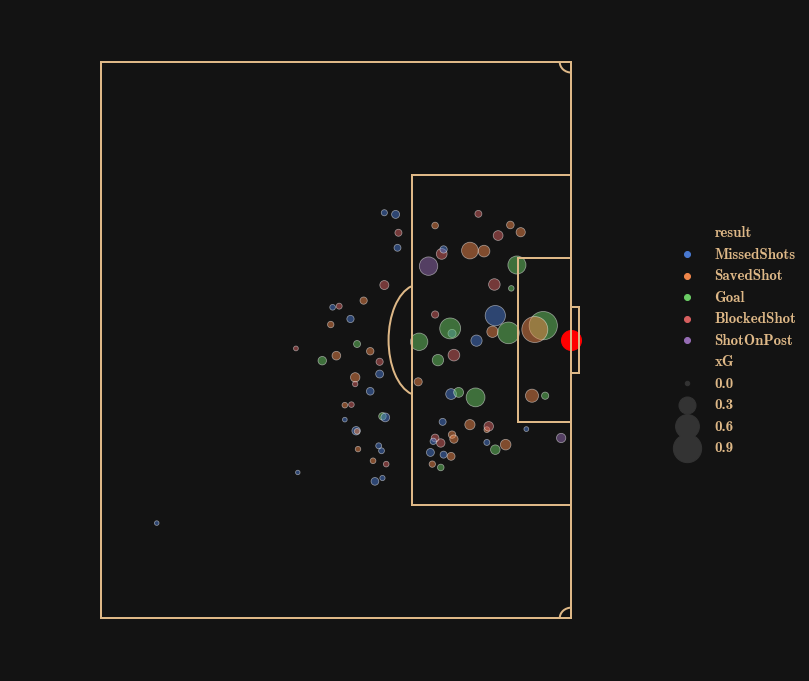

In [12]:
sns.relplot(x="X", y="Y",size="xG", hue="result", 
            sizes=(20, 800), alpha=.5, palette="muted",
            height=10, data=df)

plt.gcf().set_facecolor("#131313")
# plt.text(x=.6, y=1.05, s=f'Olympique Lyon | {df.loc[0,"player"]} 20/21', color="#DEB887", fontproperties=font_label2.prop, fontsize=22)
media_cancha(outer_lines=True)
plt.xlim(0.4,1.1)
plt.ylim(-0.1,1.1)
plt.axis("off")
plt.scatter(x=1,y=0.5,color="red",s=400)
# plt.scatter(x=0.94,y=0.55,color="blue",s=20)


# plt.savefig(f'/work/output/barcelona/shotmap{df.loc[1,"player"]}2021.png', dpi=200, bbox_inches="tight",facecolor='#131313')

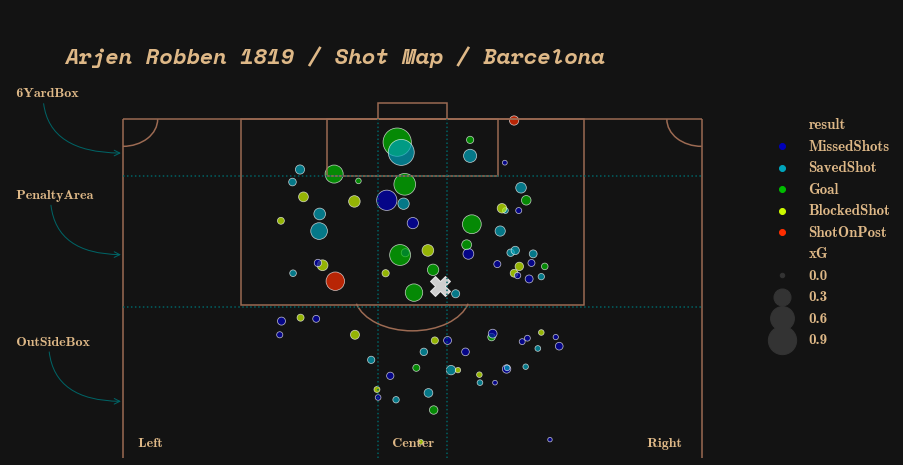

In [13]:
df["X_vert"]=df["X"]*1.01
df["Y_vert"]=df["Y"]

sns.relplot(x="Y_vert", y="X_vert",size="xG", hue="result", 
            sizes=(20, 800), alpha=.7, palette="nipy_spectral",
            height=7, aspect=1.5, data=df)

plt.gcf().set_facecolor("#131313")
plt.text(x=1.1, y=1.05, s=f'{df.loc[1,"player"]} 1819 / Shot Map / Barcelona', color="#DEB887", fontproperties=font_label2.prop, fontsize=22)
media_cancha_vertical(outer_lines=True)
plt.xlim(-.1,1.1)
plt.ylim(.7,1.1)
plt.axis("off")

plt.gca().invert_xaxis()

plt.plot((1,0),(0.834,0.834),"#006466",linestyle = ":")
plt.plot((1,0),(0.95,0.95),"#006466",linestyle = ":")


arrow_dict = dict(arrowstyle = "->",
                  connectionstyle = "angle3", 
                  color = "#006466")

plt.gca().annotate("  " + "OutSideBox",
                   xy = (1, .75), size = 14, xytext = (1.2, .8),
                   color = text_color, arrowprops = arrow_dict)

plt.gca().annotate("  " + "PenaltyArea",
                   xy = (1, .88), size = 14, xytext = (1.2, .93),
                   color = text_color, arrowprops = arrow_dict)

plt.gca().annotate("  " + "6YardBox",
                   xy = (1, .97), size = 14, xytext = (1.2, 1.02),
                   color = text_color, arrowprops = arrow_dict)



plt.plot((0.44,0.44),(0,1),"#006466",linestyle = ":")
plt.plot((.56,0.56),(0,1),"#006466",linestyle = ":")

plt.gca().annotate("  " + "Left",
                   xy = (.8, .75), size = 14, xytext = (.99, .71),
                   color = text_color)

plt.gca().annotate("  " + "Center",
                   xy = (.5, .75), size = 14, xytext = (0.55, .71),
                   color = text_color)

plt.gca().annotate("  " + "Right",
                   xy = (.2, .75), size = 14, xytext = (.11, .71),
                   color = text_color)

    
plt.scatter(x=df["Y_vert"].mean(),y=df["X_vert"].mean(),color="white",s=400,marker="X",alpha=.8)


# plt.savefig(f'/work/output/barcelona/shotmap{df.loc[1,"player"]}1819.png', dpi=200, bbox_inches="tight",facecolor='#131313')




In [69]:
df["result"].value_counts()
# df["shotType"].value_counts()

SavedShot      26
BlockedShot    23
MissedShots    12
Goal            5
ShotOnPost      3
Name: result, dtype: int64

In [14]:
background = '#131313'
text_color = '#DEB887'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='cmb10'
mpl.rcParams['legend.fontsize'] = 15

In [16]:
sns.set(palette="deep", font='Noto Sans')
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

ValueError: 'explode' must be of length 'x'

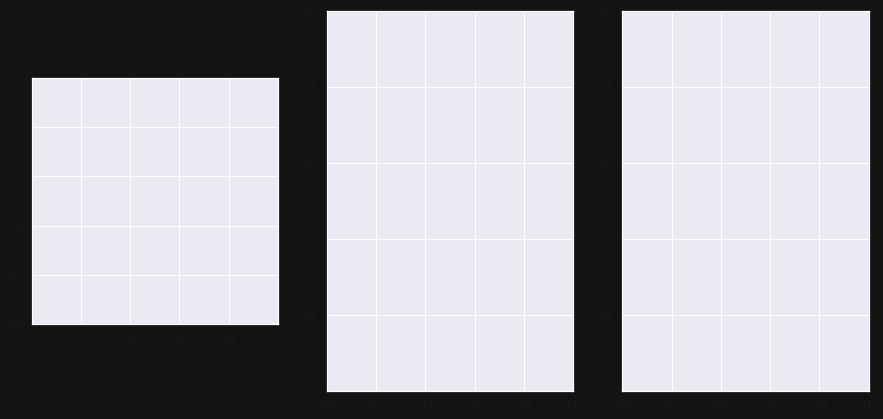

In [17]:
fig,ax = plt.subplots(1,3,figsize=(15,7))
fig.set_facecolor("#131313")

ax[0].pie(df["result"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
      labels=df["result"].unique(), counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,explode=[0, 0, 0, 0],
      colors=["#76030f","#550b2c","#33134a","#121b67"]
         )
ax[0].set_title("Shot Result (102)",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


ax[1].pie(df["shotType"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=df["shotType"].unique(),
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#121b67","#440f3b"]
      )
ax[1].set_title("Shot Type",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)

zoneDF=pd.DataFrame({"count":[34,26,50]},index=["Right","Center","Left"])
ax[2].pie(zoneDF.values,
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       counterclock=False, startangle=90,
       labels=["Right", "Center", "Left"],
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#440f3b","#121b67"]
         )
ax[2].set_title("Shot Zone",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


fig.suptitle("Memphys Depay's Shot Ability 20/21", x=.48,y=1, fontdict={"color":"white","fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=22)
# plt.savefig(f'/work/output/barcelona/{df.loc[1,"player"]}2021shot1.png', dpi=200, bbox_inches="tight",facecolor='#131313')

Text(0.5, 1.0, 'BlockedShot (18)')

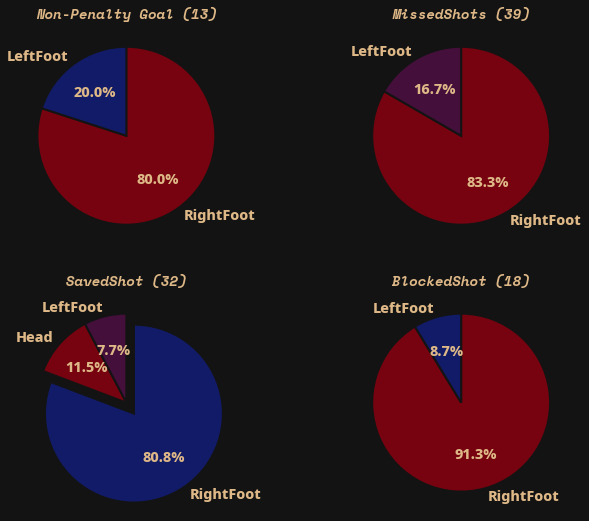

In [70]:
fig,ax = plt.subplots(2,2,figsize=(11,9))
fig.set_facecolor("#131313")
ax = ax.ravel()

ax[0].pie(df[df["result"]=="Goal"]["shotType"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=df[df["result"]=="Goal"]["shotType"].unique(),
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#121b67"]
      )
ax[0].set_title("Non-Penalty Goal (13)",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


ax[1].pie(df[df["result"]=="MissedShots"]["shotType"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=df[df["result"]=="MissedShots"]["shotType"].unique(),
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#440f3b","#121b67"]
      )
ax[1].set_title("MissedShots (39)",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


ax[2].pie(df[df["result"]=="SavedShot"]["shotType"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=df[df["result"]=="SavedShot"]["shotType"].unique(),
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#121b67","#76030f","#440f3b"],
       explode=[0.15, 0, 0],
      )
ax[2].set_title("SavedShot (32)",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)

ax[3].pie(df[df["result"]=="BlockedShot"]["shotType"].value_counts(),
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=df[df["result"]=="BlockedShot"]["shotType"].unique(),
       counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#121b67"]
      )
ax[3].set_title("BlockedShot (18)",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)

# plt.savefig(f'/work/output/barcelona/{df.loc[1,"player"]}2021shot2.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [50]:
df["areaX"] = pd.cut(df["X"],bins=[0,0.83,0.94,1], right=True, labels=False)
df["areaY"] = pd.cut(df["Y"], bins=[0,0.45,0.55,1], right=True, labels=False)

pdf = df[["shotType","areaY","xG","h_goals","a_goals"]]

In [51]:



df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,areaX,areaY
0,218421.0,54.0,BlockedShot,0.776,0.730,0.016285,Philippe Coutinho,h,488.0,OpenPlay,...,9961.0,Barcelona,Alaves,3.0,0.0,2018-08-18 23:15:00,Jordi Alba,Pass,0,2
1,218424.0,60.0,BlockedShot,0.817,0.657,0.040660,Philippe Coutinho,h,488.0,OpenPlay,...,9961.0,Barcelona,Alaves,3.0,0.0,2018-08-18 23:15:00,NaN,Dispossessed,0,2
2,218430.0,81.0,SavedShot,0.927,0.600,0.387876,Philippe Coutinho,h,488.0,OpenPlay,...,9961.0,Barcelona,Alaves,3.0,0.0,2018-08-18 23:15:00,Lionel Messi,Throughball,1,2
3,218431.0,82.0,Goal,0.858,0.602,0.092105,Philippe Coutinho,h,488.0,OpenPlay,...,9961.0,Barcelona,Alaves,3.0,0.0,2018-08-18 23:15:00,Arthur,Pass,1,2
4,220507.0,34.0,SavedShot,0.812,0.658,0.035432,Philippe Coutinho,a,488.0,OpenPlay,...,9971.0,Real Valladolid,Barcelona,0.0,1.0,2018-08-25 23:15:00,Sergio Busquets,Pass,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,297617.0,4.0,SavedShot,0.738,0.510,0.021518,Philippe Coutinho,h,488.0,OpenPlay,...,10305.0,Barcelona,Levante,1.0,0.0,2019-04-27 19:45:00,NaN,TakeOn,0,1
65,297621.0,24.0,SavedShot,0.895,0.631,0.081095,Philippe Coutinho,h,488.0,OpenPlay,...,10305.0,Barcelona,Levante,1.0,0.0,2019-04-27 19:45:00,Arthur,Pass,1,2
66,297622.0,25.0,SavedShot,0.921,0.496,0.368104,Philippe Coutinho,h,488.0,OpenPlay,...,10305.0,Barcelona,Levante,1.0,0.0,2019-04-27 19:45:00,Jordi Alba,Chipped,1,1
67,297623.0,26.0,SavedShot,0.805,0.633,0.032292,Philippe Coutinho,h,488.0,OpenPlay,...,10305.0,Barcelona,Levante,1.0,0.0,2019-04-27 19:45:00,Jordi Alba,Pass,0,2


In [53]:
pdf = df.groupby(by=["shotType", "areaY"]).agg(averageXg = ('xG', 'mean'), shotCountByArea= ('xG', 'count'))

In [54]:
pdf.loc["LeftFoot","shotCountByArea"]
df.groupby(by=["areaY"]).agg(averageXg = ('xG', 'median'), shotCountByArea= ('xG', 'count'))

,averageXg,shotCountByArea
areaY,,
0,0.139812,4
1,0.064690,17
2,0.041812,48


NameError: name 'text_color' is not defined

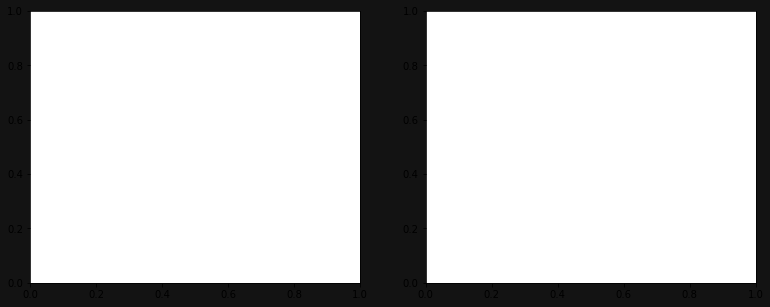

In [9]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
fig.set_facecolor("#131313")

ax[0].pie(pdf.loc["LeftFoot","shotCountByArea"].values,
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       counterclock=False, startangle=90,
       labels=["Right", "Center", "Left"],
       autopct='%1.1f%%', pctdistance=0.6,
       colors=["#76030f","#440f3b","#121b67"]
         )
ax[0].set_title("Shot Zone of Left Foot",fontdict={"color":text_color,"fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)

ax[1].pie(pdf.loc["RightFoot","shotCountByArea"].values,
       textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
       wedgeprops={"lw": 2, "ec": "#131313"},
       labels=["Right", "Center", "Left"], counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.6,explode=[0, 0, 0],
       colors=["#76030f","#440f3b","#121b67"]
         )
ax[1].set_title("Shot Zone of Right Foot",fontdict={"color":"white","fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)

# plt.savefig(f'/work/output/barcelona/{df.loc[1,"player"]}2021shot3.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [36]:
goal = df[df["result"]=="Goal"]
# goal = df
df.loc[:,"areaY"].value_counts()
# goal

2    60
0    22
1    21
Name: areaY, dtype: int64

Text(0.5, 0.98, '')

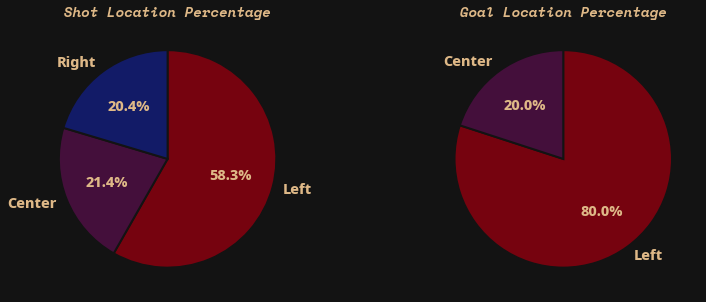

In [37]:

fig,ax = plt.subplots(1,2,figsize=(13,5))
fig.set_facecolor("#131313")

ax[0].pie(df.loc[:,"areaY"].value_counts(),
          textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
           wedgeprops={"lw": 2, "ec": "#131313"},counterclock=False, startangle=90,
           autopct='%1.1f%%', pctdistance=0.6, labels=["Left", "Center", "Right"],
           colors=["#76030f","#440f3b","#121b67"])

ax[0].set_title("Shot Location Percentage",fontdict={"color":"white","fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


ax[1].pie(goal.loc[:,"areaY"].value_counts(),
         textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
           wedgeprops={"lw": 2, "ec": "#131313"},counterclock=False, startangle=90,
           autopct='%1.1f%%', pctdistance=0.6, labels=["Left","Center"],
           colors=["#76030f","#440f3b","#121b67"])

ax[1].set_title("Goal Location Percentage",fontdict={"color":"white","fontweight":"bold"},color=text_color, fontproperties=font_label2.prop, fontsize=14)


## this is about X


# ax[0].pie(df.loc[:,"areaX"].value_counts(),
#          textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
#            wedgeprops={"lw": 2, "ec": "#131313"},counterclock=False, startangle=90,
#            autopct='%1.1f%%', pctdistance=0.6, labels=["OutSideBox","PenaltyArea","6yardBox"],
#            colors=["#76030f","#440f3b","#121b67"])


# ax[1].pie(goal.loc[:,"areaX"].value_counts(),
#          textprops={"color":text_color,'size': 'large',"fontweight":"bold","fontfamily":"Noto sans"},
#            wedgeprops={"lw": 2, "ec": "#131313"},counterclock=False, startangle=90,
#            autopct='%1.1f%%', pctdistance=0.6, labels=["PenaltyArea","OutSideBox","6yardBox"],
#            colors=["#76030f","#440f3b","#121b67"])

fig.suptitle("",color=text_color,fontsize=20)

# plt.savefig(f'/work/output/barcelona/{df.loc[1,"player"]}1617shot4.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [89]:
zdf=df.groupby(by=["areaY","shotType"]).agg(averageXg = ('xG', 'mean'), shotCountByArea= ('xG', 'count'))
zdfX = df.groupby(by=["areaX","shotType"]).agg(averageXg=("xG","mean"),shotCountByArea=("xG","count"))
zdfX

averageXg  shotCountByArea
areaX shotType                             
0     LeftFoot    0.045433                1
      RightFoot   0.033272               35
1     Head        0.221422                3
      LeftFoot    0.213820                5
      RightFoot   0.163247               22
2     LeftFoot    0.128918                1
      RightFoot   0.590063                2

ValueError: shape mismatch: objects cannot be broadcast to a single shape

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


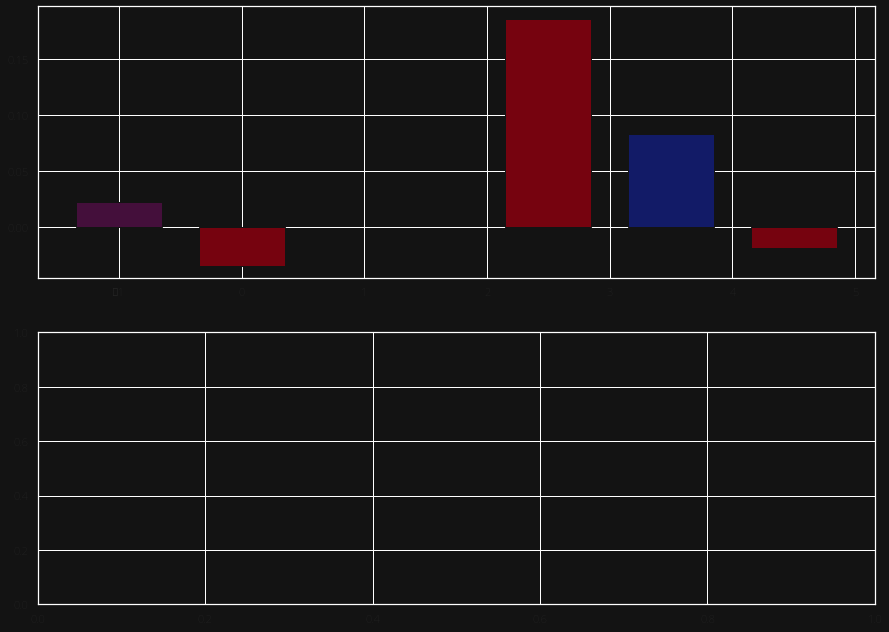

In [90]:
fig,axes = plt.subplots(2,1,figsize=(15,11))
fig.set_facecolor("#131313")
axes[0].set_facecolor("#131313")
axes[1].set_facecolor("#131313")

x1 = np.arange(len(zdf.loc[0].index))
x2 = np.arange(len(zdf.loc[1].index))
x3 = np.arange(len(zdf.loc[2].index))



ax = axes[0]

ax.bar(x=x1-1, height=zdf.loc[0,"averageXg"].values-zdf.loc[:,"averageXg"].mean(), width=0.7,
       color=["#440f3b","#76030f","#121b67"],edgecolor="#131313")
ax.bar(x=x2+2.5, height=zdf.loc[1,"averageXg"].values-zdf.loc[:,"averageXg"].mean(), width=0.7,
       color=["#76030f","#121b67"],edgecolor="#131313")
ax.bar(x=x1+5, height=zdf.loc[2,"averageXg"].values-zdf.loc[:,"averageXg"].mean(), width=0.7,
       color=["#440f3b","#76030f","#121b67"],edgecolor="#131313")

ax.set_xticks([0,3,6])
ax.set_xticklabels(
    np.array(["Right", "Center", "Left"]),
    fontdict={"color":text_color,"fontsize":14,"fontWeight":"bold"})

ax.set_yticks([-.1,0,0.1,0.2])
ax.set_yticklabels(
    np.array([-.1, 0,.1,.2]),
    fontdict={"color":text_color,"fontsize":14,"fontWeight":"bold"})

ax.grid(False)

ax.plot([-1.59, 8], [0,0], 
        color=text_color, ls="-", lw=1.5, alpha=0.7, zorder=1
)

ax.plot([1.7, 1.7], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.plot([4.3, 4.3], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.plot([7.7, 7.7], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

ax = axes[1]

x1 = np.arange(len(zdfX.loc[0].index))
x2 = np.arange(len(zdfX.loc[1].index))
x3 = np.arange(len(zdfX.loc[2].index))

ax.bar(x=x1-1, height=zdfX.loc[0,"averageXg"].values-zdfX.loc[:,"averageXg"].mean(), width=0.7,
       color=["#76030f","#121b67"],edgecolor="#131313")
ax.bar(x=x2+2, height=zdfX.loc[1,"averageXg"].values-zdfX.loc[:,"averageXg"].mean(), width=0.7,
       color=["#440f3b","#76030f","#121b67"],edgecolor="#131313")
ax.bar(x=x1+6, height=zdfX.loc[2,"averageXg"].values-zdfX.loc[:,"averageXg"].mean(), width=0.7,
       color=["#76030f","#121b67"],edgecolor="#131313")

ax.set_xticks([-.5,3,6.3])
ax.set_xticklabels(
    np.array(["OutSideBox", "PenaltyArea", "6YardBox"]),
    fontdict={"color":text_color,"fontsize":14,"fontWeight":"bold"})

ax.set_yticks([-.1,0,0.1,0.2])
ax.set_yticklabels(
    np.array([-.1, 0,.1,.2]),
    fontdict={"color":text_color,"fontsize":14,"fontWeight":"bold"})

ax.grid(False)

ax.plot([-1.59, 8], [0,0], 
        color=text_color, ls="-", lw=1.5, alpha=0.7, zorder=1
)

ax.plot([1.2, 1.2], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.plot([4.8, 4.8], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.plot([7.7, 7.7], [-.15,.2], 
        color=text_color, ls="-", lw=1.5, alpha=0.4, zorder=1
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)

from highlight_text import htext
htext.fig_text(
    x=.15,y=.93,
    s="xG Performance in Each Zone: <Head>  <LeftFoot>  <RightFoot>.",
    fontsize=18,
    color=text_color,
    highlight_colors=["#B913D6","crimson","#132AD6"],
    highlight_weights = 'bold',
    highlight_styles = 'oblique',
    fontname='Noto sans'
)


plt.savefig(f'/work/output/barcelona/{df.loc[1,"player"]}2021shot4.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [127]:
goal.loc[:,"areaX"].value_counts()

0    36
1    30
2     3
Name: areaX, dtype: int64

In [113]:
goal

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,areaX,areaY
3,218431.0,82.0,Goal,0.858,0.602,0.092105,Philippe Coutinho,h,488.0,OpenPlay,...,9961.0,Barcelona,Alaves,3.0,0.0,2018-08-18 23:15:00,Arthur,Pass,1,2
15,226626.0,11.0,Goal,0.811,0.542,0.052952,Philippe Coutinho,a,488.0,OpenPlay,...,10013.0,Leganes,Barcelona,2.0,1.0,2018-09-26 18:00:00,Lionel Messi,Pass,0,1
22,258290.0,1.0,Goal,0.855,0.554,0.386314,Philippe Coutinho,h,488.0,OpenPlay,...,10037.0,Barcelona,Sevilla,4.0,2.0,2018-10-20 18:45:00,Lionel Messi,Throughball,1,2
27,258641.0,10.0,Goal,0.907,0.470,0.485250,Philippe Coutinho,h,488.0,OpenPlay,...,10047.0,Barcelona,Real Madrid,5.0,1.0,2018-10-28 14:15:00,Jordi Alba,Pass,1,1
51,291091.0,11.0,Goal,0.970,0.513,0.852985,Philippe Coutinho,a,488.0,OpenPlay,...,10250.0,Villarreal,Barcelona,4.0,4.0,2019-04-02 20:30:00,Malcom,Pass,2,1
